# Model Testing

So how does the final model fair? To test it out, I've collected some emotional movie scenes to see what kinds of emotions the model lables. Since examples of `Happy` and `Neutral` were surprisingly hard to come by, I instead recorded myself reading the poem “Stopping by Woods on a Snowy Evening” by Robert Frost.

Here are the movies I'm currently using and links to the scenes
- [A Few Good Men](https://youtu.be/9FnO3igOkOk?t=39) (Anger/Disgust Test)
- [Pulp Fiction](https://youtu.be/qo5jnBJvGUs?t=27)  (Anger Test)
- [Steel Magnolias](https://www.youtube.com/watch?v=iZx1W6cHw-g) (Sad Test)
- [The Blair Witch Project](https://www.youtube.com/watch?v=2m_lqGnLtWA) (Fear/Sad Test)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import ModelTestDefinitions as test

In [2]:
# get audio and extract features
test.audio_to_images('Audio Clips Here!','Clip Images')
X,y = test.load_images('Clip Images')

In [3]:
# What percent did the model label as what emotions?
predict = test.predictions(X,y)
pred_percent = predict.percent()
pred_percent

,anger,disgust,fear,happy,neutral,sad
A Few Good Men - Anger_Disgust Test,47,36,0,5,0,10
Happy Test,50,12,0,12,0,25
Neutral Test,25,25,0,0,37,12
Pulp Fiction - Anger Test,100,0,0,0,0,0
Steel Magnolias - Sad Test,3,3,10,1,0,80
The Blair Witch Project - Fear_Sad Test,6,6,50,0,0,36


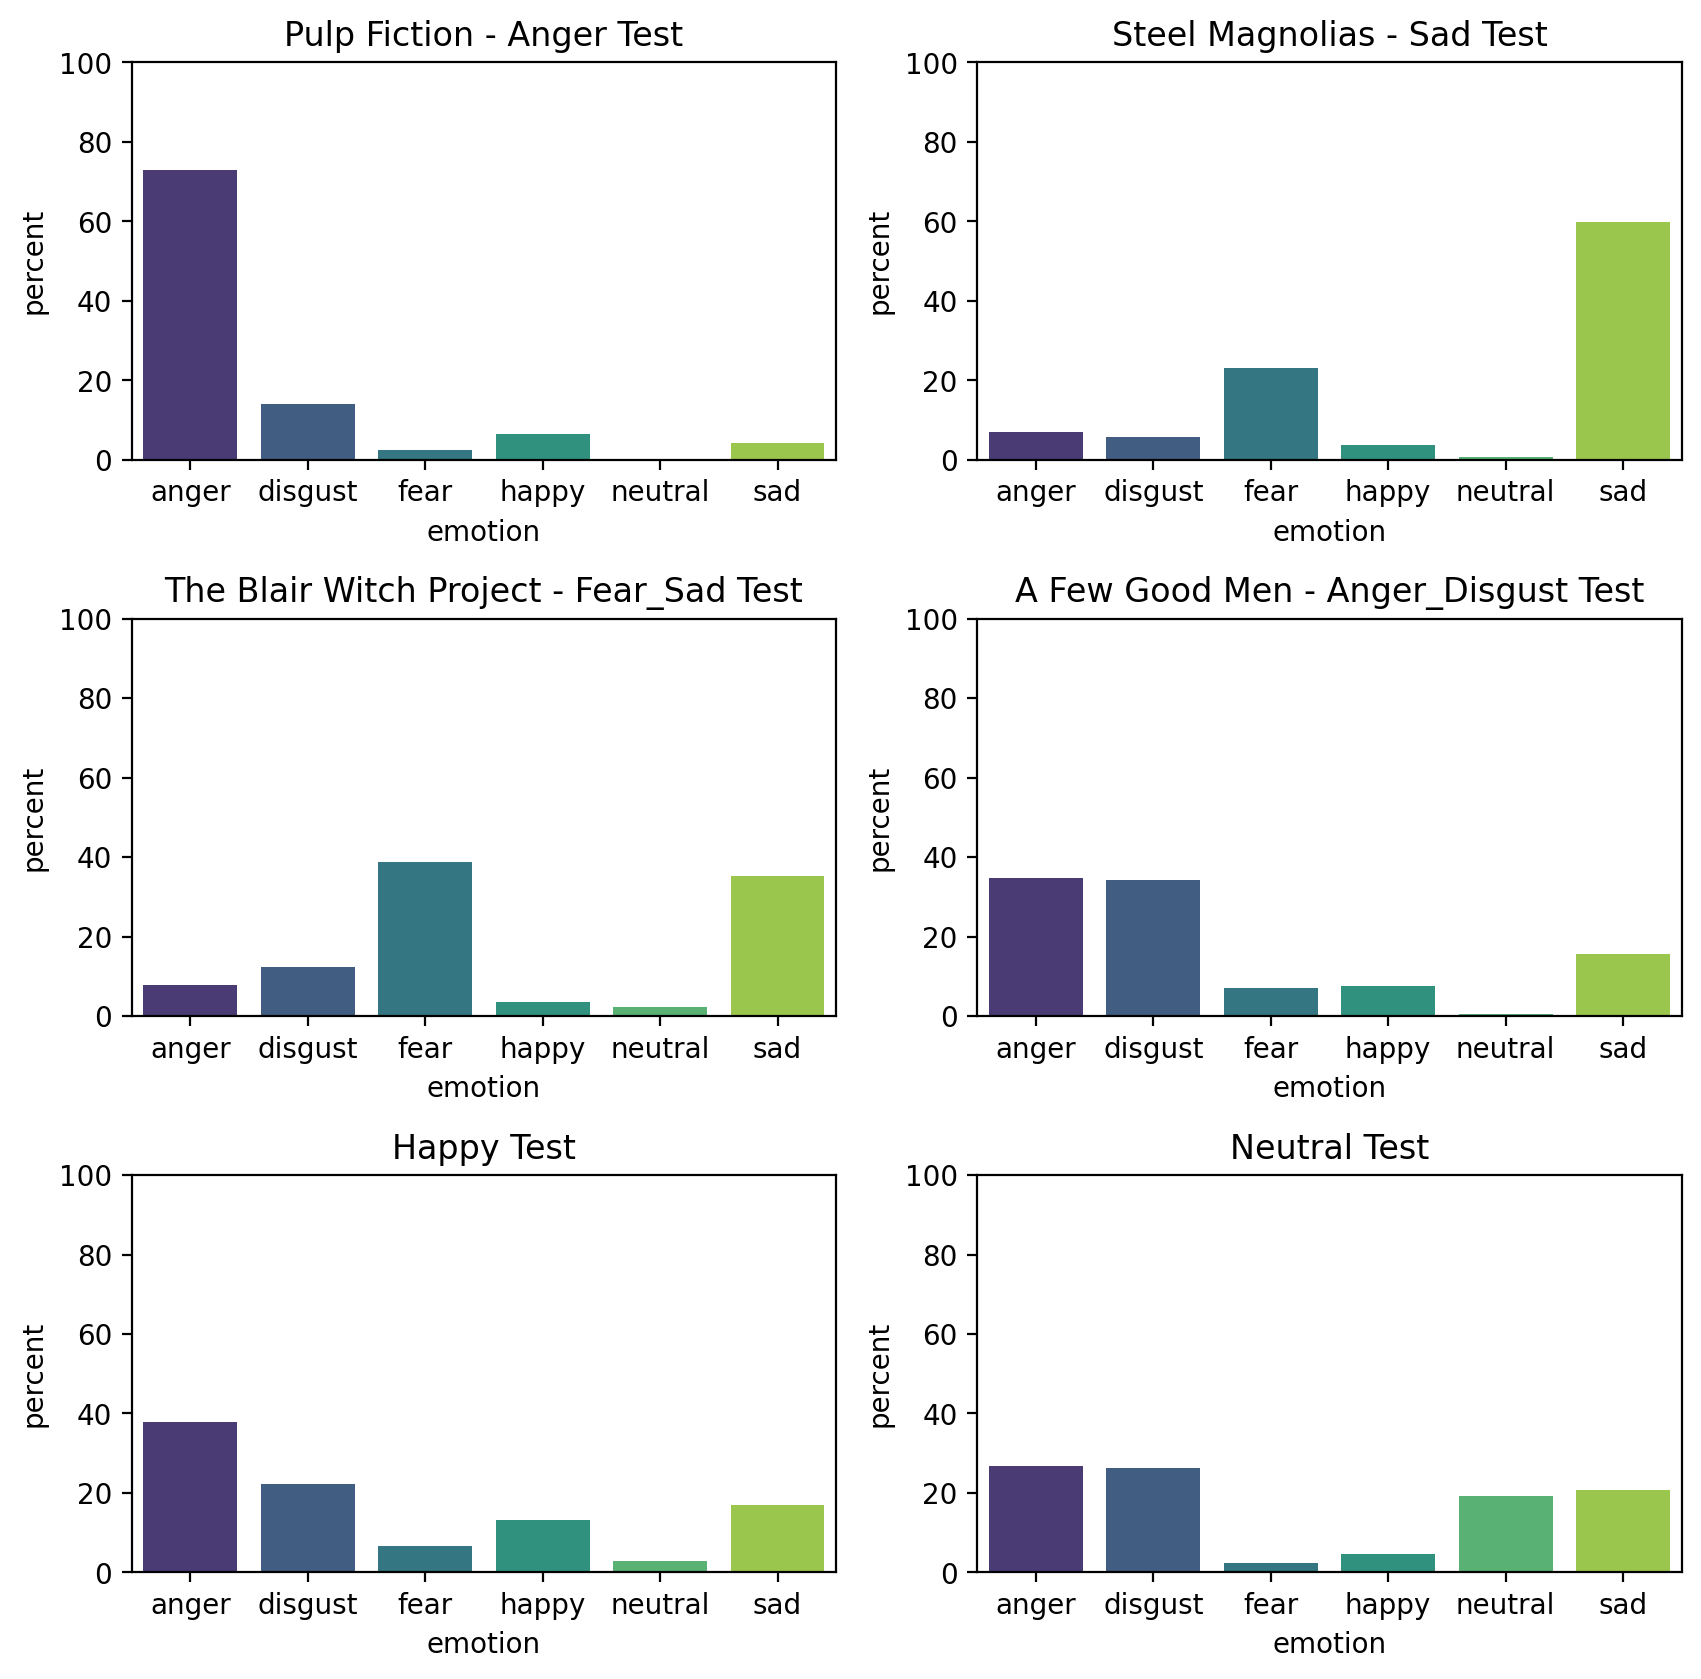

In [56]:
# Whats the sum of all probabilities?
plt.figure(figsize=(10,10),dpi=200)
plt.subplots_adjust(hspace=0.4)

clip_names = ['Pulp Fiction - Anger Test', 'Steel Magnolias - Sad Test',
              'The Blair Witch Project - Fear_Sad Test','A Few Good Men - Anger_Disgust Test', 
              'Happy Test', 'Neutral Test']

for n,track in enumerate(clip_names,start=1):
    clip = predict.data.loc[track].sum().drop('pred')
    clip = clip/clip.sum()*100
    clip = pd.DataFrame(clip).reset_index()
    plt.subplot(3,2,n)
    sns.barplot(data=clip, x='index',y=0,palette='viridis')
    plt.ylim(0,100)
    plt.ylabel('percent')
    plt.xlabel('emotion')
    plt.title(track,loc='center')